In [1]:
import os
import tensorflow as tf
import numpy as np
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
import time
%matplotlib inline
train_data = CIFAR100DataProvider('train', batch_size=50)
valid_data = CIFAR100DataProvider('valid', batch_size=50)

In [2]:
def fully_connected_layer_elu(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

In [10]:
def error_acc():
    list_train_error=[]
    list_train_acc=[]
    list_vald_error=[]
    list_vald_acc=[]
    with tf.Session() as sess:
        sess.run(init)
        for e in range(30):
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                start_time= time.time()
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            if (e + 1) % 3 ==0:
                list_train_error.append(running_error)
                list_train_acc.append(running_accuracy)
                end_time= start_time - time.time()
                print('Completed time{0:.2f}s End of epoch {1:02d}: err(train)={2:.2f} acc(train)={3:.2f}'
                      .format(end_time, e + 1, running_error, running_accuracy))
            if (e + 1) % 3 == 0:
                valid_error = 0.
                valid_accuracy = 0.
                for input_batch, target_batch in valid_data:
                    batch_error, batch_acc = sess.run(
                        [error, accuracy], 
                        feed_dict={inputs: input_batch, targets: target_batch})
                    valid_error += batch_error
                    valid_accuracy += batch_acc
                valid_error /= valid_data.num_batches
                valid_accuracy /= valid_data.num_batches
                list_vald_error.append(valid_error)
                list_vald_acc.append(valid_accuracy)
                print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                       .format(valid_error, valid_accuracy))
        return list_train_error,list_train_acc,list_vald_error,list_vald_acc
def graph(train_error, train_acc, vald_error, vald_acc):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.plot(np.arange(1,31,3),train_error, label='train error')
    ax1.plot(np.arange(1,31,3),vald_error, label='valid error')
    ax1.legend(loc='upper right')
    #ax1.set_yscale('log')
    ax1.set_xlabel('epoch number')
    ax1.set_ylabel('errors')
    ax1.set_ylim(1,5)
    ax1.set_title('error comparsion')
    ax2.plot(np.arange(1,31,3),train_acc, label='train acc')
    ax2.plot(np.arange(1,31,3),vald_acc, label='valid acc')
    ax2.legend(loc='upper right')
    #ax2.set_yscale('log')
    ax2.set_xlabel('epoch number')
    ax2.set_ylabel('accuracy')
    ax2.set_title('accuracy comparsion')
    ax2.set_yticks(np.arange(0,1,0.1))

In [12]:
#elu with Adagrad Optimizer with fixed initilized learning rate =0.01num_hidden = 200
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(error)
init = tf.global_variables_initializer()
elu3_Agrad_train_error, elu3_Agrad_train_acc,elu3_Agrad_vald_error,elu3_Agrad_vald_acc = error_acc()

Completed time-0.16s End of epoch 03: err(train)=3.60 acc(train)=0.16
                 err(valid)=3.59 acc(valid)=0.16
Completed time-0.14s End of epoch 06: err(train)=3.37 acc(train)=0.20
                 err(valid)=3.48 acc(valid)=0.18
Completed time-0.15s End of epoch 09: err(train)=3.23 acc(train)=0.23
                 err(valid)=3.39 acc(valid)=0.21
Completed time-0.19s End of epoch 12: err(train)=3.13 acc(train)=0.25
                 err(valid)=3.35 acc(valid)=0.22
Completed time-0.19s End of epoch 15: err(train)=3.04 acc(train)=0.27
                 err(valid)=3.32 acc(valid)=0.22
Completed time-0.15s End of epoch 18: err(train)=2.97 acc(train)=0.28
                 err(valid)=3.29 acc(valid)=0.22
Completed time-0.14s End of epoch 21: err(train)=2.90 acc(train)=0.29
                 err(valid)=3.26 acc(valid)=0.23
Completed time-0.16s End of epoch 24: err(train)=2.84 acc(train)=0.31
                 err(valid)=3.26 acc(valid)=0.23
Completed time-0.15s End of epoch 27: err(train)

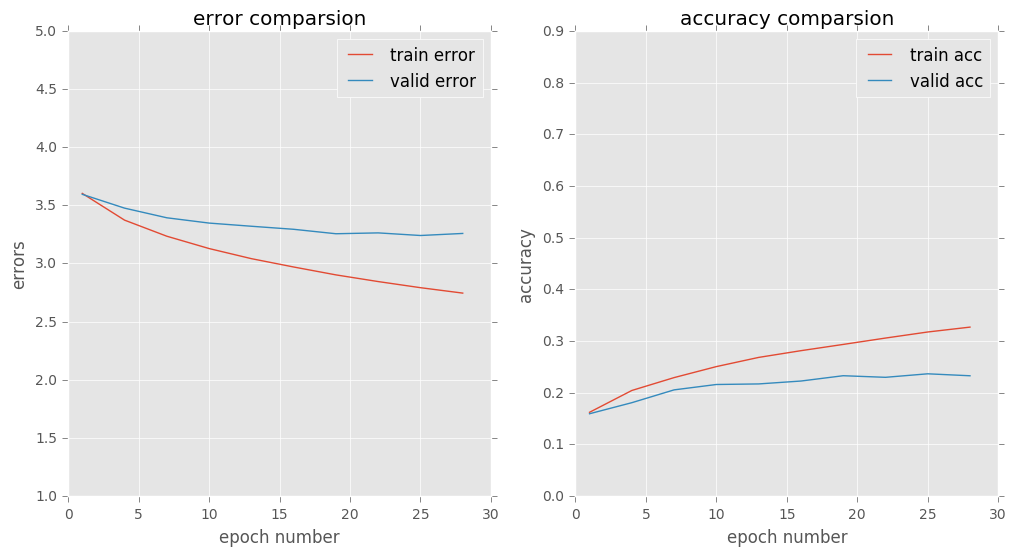

In [13]:
_=graph(elu3_Agrad_train_error, elu3_Agrad_train_acc,elu3_Agrad_vald_error,elu3_Agrad_vald_acc)

In [14]:
def fully_connected_layer_elu_with_norm(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    Wx_plus_b = tf.matmul(inputs, weights) + biases
    fc_mean, fc_var = tf.nn.moments(Wx_plus_b,axes=[0])
    scale = tf.Variable(tf.ones([output_dim]))
    shift = tf.Variable(tf.zeros([output_dim]))
    epsilon = 0.001
    ema = tf.train.ExponentialMovingAverage(decay=0.5)
    def mean_var_with_update():
        ema_apply_op = ema.apply([fc_mean, fc_var])
        with tf.control_dependencies([ema_apply_op]):
            return tf.identity(fc_mean), tf.identity(fc_var)
    mean, var = mean_var_with_update()

    Wx_plus_b = tf.nn.batch_normalization(Wx_plus_b, mean, var, shift, scale, epsilon)
    outputs = nonlinearity(Wx_plus_b)
    return outputs

In [15]:
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu_with_norm(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu_with_norm(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu_with_norm(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(error)
init = tf.global_variables_initializer()
elu3_Norm_train_error, elu3_Norm_train_acc,elu3_Norm_vald_error,elu3_Norm_vald_acc = error_acc()

Completed time-0.16s End of epoch 03: err(train)=3.58 acc(train)=0.18
                 err(valid)=3.63 acc(valid)=0.17
Completed time-0.16s End of epoch 06: err(train)=3.36 acc(train)=0.22
                 err(valid)=3.55 acc(valid)=0.19
Completed time-0.15s End of epoch 09: err(train)=3.21 acc(train)=0.25
                 err(valid)=3.51 acc(valid)=0.19
Completed time-0.15s End of epoch 12: err(train)=3.08 acc(train)=0.28
                 err(valid)=3.49 acc(valid)=0.19
Completed time-0.15s End of epoch 15: err(train)=2.98 acc(train)=0.30
                 err(valid)=3.47 acc(valid)=0.20
Completed time-0.16s End of epoch 18: err(train)=2.88 acc(train)=0.32
                 err(valid)=3.50 acc(valid)=0.20
Completed time-0.17s End of epoch 21: err(train)=2.79 acc(train)=0.33
                 err(valid)=3.51 acc(valid)=0.19
Completed time-0.16s End of epoch 24: err(train)=2.71 acc(train)=0.35
                 err(valid)=3.53 acc(valid)=0.20
Completed time-0.15s End of epoch 27: err(train)